# **Predicting Movie Rental Durations**

The data they provided is in the csv file `rental_info.csv`. It has the following features:

- `"rental_date"`: The date (and time) the customer rents the DVD.
- `"return_date"`: The date (and time) the customer returns the DVD.
- `"amount"`: The amount paid by the customer for renting the DVD.
- `"amount_2"`: The square of `"amount"`.
- `"rental_rate"`: The rate at which the DVD is rented for.
- `"rental_rate_2"`: The square of `"rental_rate"`.
- `"release_year"`: The year the movie being rented was released.
- `"length"`: Lenght of the movie being rented, in minuites.
- `"length_2"`: The square of `"length"`.
- `"replacement_cost"`: The amount it will cost the company to replace the DVD.
- `"special_features"`: Any special features, for example trailers/deleted scenes that the DVD also has.
- `"NC-17"`, `"PG"`, `"PG-13"`, `"R"`: These columns are dummy variables of the rating of the movie. It takes the value 1 if the move is rated as the column name and 0 otherwise. For your convinience, the reference dummy has already been dropped.

In [1]:
url = "https://raw.githubusercontent.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/main/__Projects__/18_%20Predicting_Movie_Rental_Durations/rental_info.csv"

### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

### Load the dataset

In [3]:
# Load the dataset
df = pd.read_csv(url, parse_dates=["rental_date", "return_date"])

# Initial data inspection
display(df.head())
print(df.info())
display(df.describe())

,rental_date,return_date,amount,release_year,rental_rate,length,replacement_cost,special_features,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2
0,2005-05-25 02:54:33+00:00,2005-05-28 23:40:33+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
1,2005-06-15 23:19:16+00:00,2005-06-18 19:24:16+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
2,2005-07-10 04:27:45+00:00,2005-07-17 10:11:45+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
3,2005-07-31 12:06:41+00:00,2005-08-02 14:30:41+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
4,2005-08-19 12:30:04+00:00,2005-08-23 13:35:04+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15861 entries, 0 to 15860
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   rental_date       15861 non-null  datetime64[ns, UTC]
 1   return_date       15861 non-null  datetime64[ns, UTC]
 2   amount            15861 non-null  float64            
 3   release_year      15861 non-null  float64            
 4   rental_rate       15861 non-null  float64            
 5   length            15861 non-null  float64            
 6   replacement_cost  15861 non-null  float64            
 7   special_features  15861 non-null  object             
 8   NC-17             15861 non-null  int64              
 9   PG                15861 non-null  int64              
 10  PG-13             15861 non-null  int64              
 11  R                 15861 non-null  int64              
 12  amount_2          15861 non-null  float64            
 13  l

,amount,release_year,rental_rate,length,replacement_cost,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2
count,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000
mean,4.217161,2006.885379,2.944101,114.994578,20.224727,0.204842,0.200303,0.223378,0.198726,23.355504,14832.841876,11.389287
std,2.360383,2.025027,1.649766,40.114715,6.083784,0.403599,0.400239,0.416523,0.399054,23.503164,9393.431996,10.005293
min,0.990000,2004.000000,0.990000,46.000000,9.990000,0.000000,0.000000,0.000000,0.000000,0.980100,2116.000000,0.980100
25%,2.990000,2005.000000,0.990000,81.000000,14.990000,0.000000,0.000000,0.000000,0.000000,8.940100,6561.000000,0.980100
50%,3.990000,2007.000000,2.990000,114.000000,20.990000,0.000000,0.000000,0.000000,0.000000,15.920100,12996.000000,8.940100
75%,4.990000,2009.000000,4.990000,148.000000,25.990000,0.000000,0.000000,0.000000,0.000000,24.900100,21904.000000,24.900100
max,11.990000,2010.000000,4.990000,185.000000,29.990000,1.000000,1.000000,1.000000,1.000000,143.760100,34225.000000,24.900100


### Feature engineering

In [4]:
# Feature engineering
df['rental_length_days'] = (df['return_date'] - df['rental_date']).dt.days
df['special_features'].unique()

df["deleted_scenes"] = np.where(df["special_features"].str.contains("Deleted Scenes"), 1, 0)
df["behind_the_scenes"] = np.where(df["special_features"].str.contains("Behind the Scenes"), 1, 0)

In [5]:
# Drop original special_features column
df = df.drop(columns=['special_features'])

### Correlation heatmap

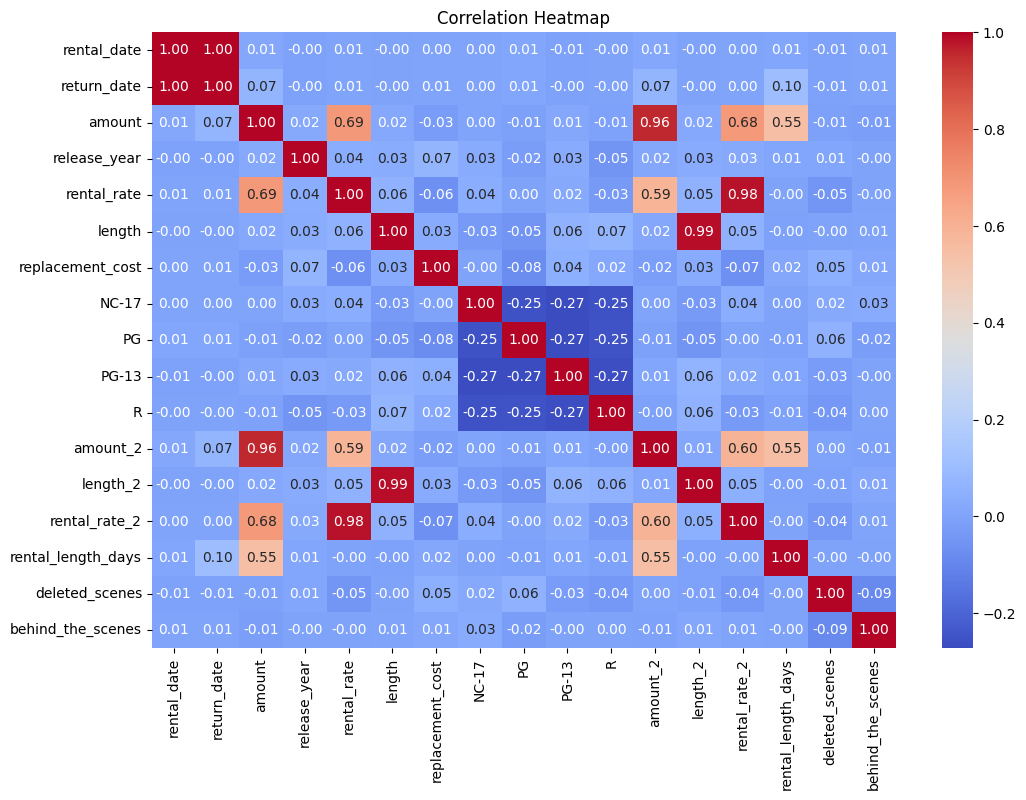

In [6]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**R2 score** (also known as the **coefficient of determination**) is a statistical measure used to assess the performance of regression machine learning models. Here are the key points:

1. **Definition**:

    - The R2 score ranges from **0 to 1**.
    - Higher values indicate a **better fit** of the model to the data.
    - It quantifies the percentage of variation in the **dependent variable** (target) that can be **explained by the independent variables** (features) included in the model.
2. **Interpretation**:

    - An **R2 score of 1.0** means that the model perfectly predicts the target variable.
    - An **R2 score of 0.0** indicates that the model’s predictions are no better than predicting the average of the target variable.
    - **Negative R2 scores** can occur if the model performs worse than a constant model (predicting the average).
3. **Usefulness**:

    - The R2 score helps evaluate how well the model captures the underlying patterns in the data.
    - It provides insights into the **goodness of fit** and the proportion of variance explained by the model.

### Model Training

In [7]:
# Data preparation
X = df.select_dtypes(include='number').drop("rental_length_days", axis=1)
y = df['rental_length_days']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

best_model = None
best_mse = np.inf
model_performance = {
    "Model": [],
    "Metric": [],
    "Value": []
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculating the metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{name}: MSE = {mse}, MAE = {mae}, R^2 = {r2}")

    model_performance["Model"].extend([name] * 3)
    model_performance["Metric"].extend(["MSE", "MAE", "R2"])
    model_performance["Value"].extend([mse, mae, r2])

    if mse < best_mse:
        best_model = model
        best_mse = mse

print(f"Best Model: {best_model}")
print(f"Best MSE: {best_mse}")

Linear Regression: MSE = 2.9417238646975736, MAE = 1.4271887754696784, R^2 = 0.5856476313096743
Decision Tree: MSE = 2.1663264720190623, MAE = 1.1063104781730833, R^2 = 0.6948651381560125
Random Forest: MSE = 2.0260129425201363, MAE = 1.0896569028421432, R^2 = 0.7146288025858678
Gradient Boosting: MSE = 2.4253464800253557, MAE = 1.2762724959250116, R^2 = 0.6583812400092269
Best Model: RandomForestRegressor()
Best MSE: 2.0260129425201363


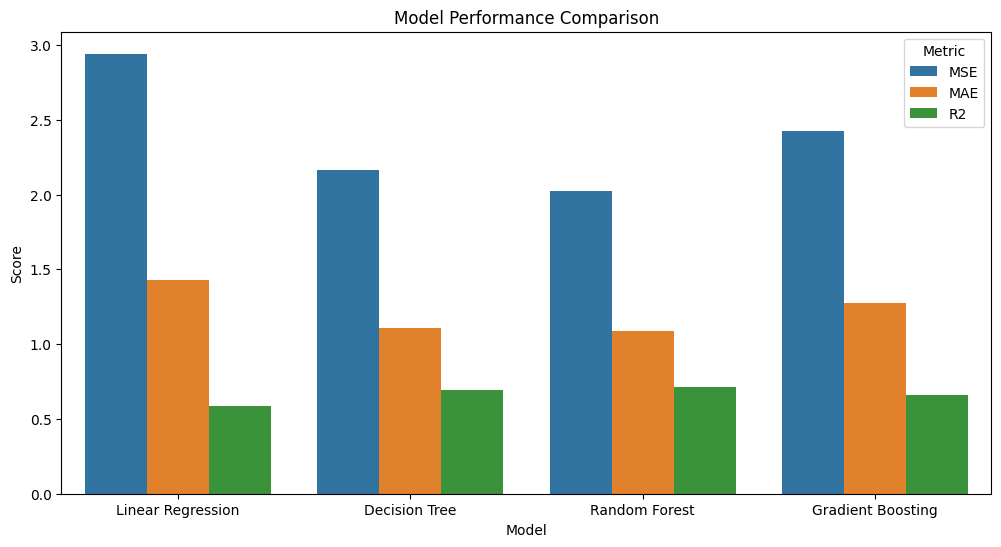

In [8]:
# Create a DataFrame for easier plotting
import pandas as pd
performance_df = pd.DataFrame(model_performance)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=performance_df, x="Model", y="Value", hue="Metric")
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.legend(title='Metric')
plt.show()

###  Model Tuning and Optimization

**Hyperparameter Tuning**:

- Perform hyperparameter tuning on the best model using techniques like Grid Search or Random Search to find the optimal set of hyperparameters.

- The `GridSearchCV` class from the `scikit-learn` library performs hyperparameter tuning using grid search. It evaluates different combinations of hyperparameters to find the best configuration for a machine learning model.
- The `n_jobs` parameter controls the number of CPU cores used during the grid search process. Specifically:
    - When `n_jobs` is set to a positive integer (e.g., 1, 2, 4), it specifies the maximum number of CPU cores to use for parallel computation. For example, if `n_jobs=2`, the grid search will use up to 2 CPU cores.
    - When `n_jobs` is set to **-1**, it means to use all available CPU cores for parallel computation. This can speed up the grid search significantly, especially when evaluating a large number of hyperparameter combinations.


The `param_grid` dictionary specifies different hyperparameter values to explore during grid search:
- `'n_estimators'`: The number of decision trees in the forest (100, 200, or 300).
- `'max_depth'`: The maximum depth of each tree (None, 10, 20, or 30).
- `'min_samples_split'`: The minimum number of samples required to split an internal node (2, 5, or 10).
- `'min_samples_leaf'`: The minimum number of samples required to be at a leaf node (1, 2, or 4).

In [9]:
from sklearn.model_selection import GridSearchCV

# Example for RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=best_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


#### Use the best parameters to train the final model

In [10]:
# Use the best parameters to train the final model
final_model = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf']
)

# Train the final model on the training data
final_model.fit(X_train, y_train)

# Predict on the test data
y_pred = final_model.predict(X_test)

# Evaluate the final model
final_mse = mean_squared_error(y_test, y_pred)
final_mae = mean_absolute_error(y_test, y_pred)
final_r2 = r2_score(y_test, y_pred)

print(f"Final Model Performance:")
print(f"MSE: {final_mse}")
print(f"MAE: {final_mae}")
print(f"R^2: {final_r2}")

Final Model Performance:
MSE: 2.03113464181755
MAE: 1.090575803211611
R^2: 0.7139073928502123


#### Performance of the final model

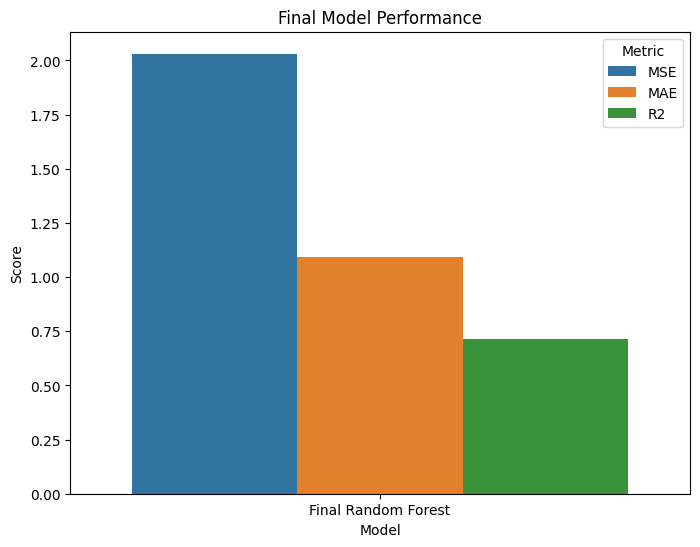

In [11]:
# Plotting
model_performance = {
    "Model": ["Final Random Forest"] * 3,
    "Metric": ["MSE", "MAE", "R2"],
    "Value": [final_mse, final_mae, final_r2]
}
performance_df = pd.DataFrame(model_performance)

plt.figure(figsize=(8, 6))
sns.barplot(data=performance_df, x="Model", y="Value", hue="Metric")
plt.title('Final Model Performance')
plt.ylabel('Score')
plt.xlabel('Model')
plt.legend(title='Metric')
plt.show()

### Model Validation

**Cross-Validation**:

- Use cross-validation to validate the model’s performance and ensure it generalizes well to unseen data.

In [12]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_model, X, y, cv=10, scoring='neg_mean_squared_error')
print(f"Cross-Validation MSE: {-cv_scores.mean()}, Std: {cv_scores.std()}")

Cross-Validation MSE: 2.6030375776386268, Std: 0.22258974404547038


### Feature Engineering

**Feature Importance**:

- Analyze feature importance to understand which features are most influential in predicting rental duration. This can also help in feature selection and dimensionality reduction.

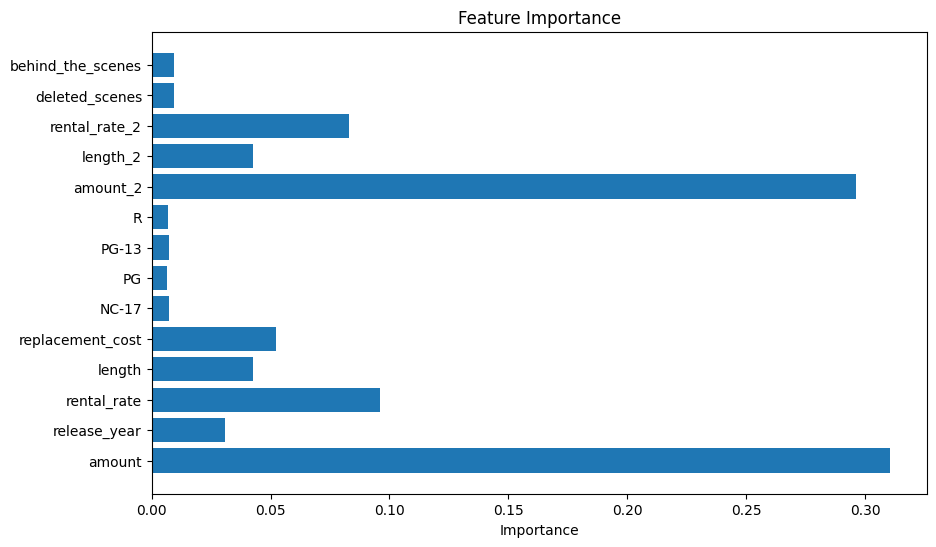

In [13]:
importances = best_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

### Model Evaluation on Additional Metrics

**Evaluation Metrics**:

- Besides `MSE`, evaluate the model using other metrics like `RMSE` (Root Mean Squared Error) and `MAE` (Mean Absolute Error).

In [14]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

RMSE: 1.4251788104717071


1. **Definition**:

    - RMSE measures the average difference between a statistical model’s predicted values and the actual observed values.
    - Mathematically, it is the **standard deviation of the residuals**, where residuals represent the distance between the regression line (model predictions) and the data points.
    - The smaller the RMSE, the better the model’s predictions align with the actual data.
2. **Interpretation**:

    - RMSE values can range from zero to positive infinity, using the same units as the dependent variable.
    - A value of 0 would mean perfect alignment between predicted and actual values (though this is rare in practice).
    - Lower RMSE values indicate that the model fits the data well and has more precise predictions.
    - Conversely, higher RMSE values suggest more error and less precise predictions.
3. **Example**:

    - Suppose we have a regression model predicting students’ final exam scores.
    - If the RMSE is 4, it means the typical difference between our model’s predictions and the actual exam scores is 4 points.
    - For instance, if the exam score ranges from 0 to 100, an RMSE of 4 indicates an average error rate of only 4%—pretty accurate predictions!
4. **Prediction Interval**:

    - You can use RMSE to estimate a rough prediction interval.
    - Assuming residuals follow a normal distribution, about 95% of observed values fall within a range of +/- 2 times the RMSE from the predicted values